In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering, KMeans
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import math
import scipy.stats as ss

from math import  sin, cos, pi 
from statsmodels.formula.api import ols
from scipy.stats import chi2
from numpy import arange

In [2]:
df = pd.read_excel(r'C:\Jypiter\Uchebnaya_tablitsa_dlya_issledovania.xlsx')
df.head(10)

features = list(df.columns.values)
f_len = len (features)
df.head(10)

#data = ['FEATURE_251','FEATURE_252','FEATURE_253','FEATURE_254','FEATURE_255']
#data_2 = ['FEATURE_231','FEATURE_232','FEATURE_233','FEATURE_234','FEATURE_235']
#data = data + data_2

#df = df.loc[:, data]
#len_pr = len(data)
#print(len)

,Кредит.организация,bad,Субъект федерации,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,...,Кол-во физ. лиц,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов
0,КО1,0,Город Москва,12263861,280074328480,18766,11492,21298,20183270043,6.863105,...,7170,25,56,396,7.448889,18304,19261,39.171766,61.461976,2.163462
1,КО2,0,Город Санкт-Петербург,5208690,157537353,205,223,114,169231559,0.000000,...,26,0,0,1,7.171315,277,304,9.386282,90.613718,0.361011
2,КО3,1,Город Москва,12263861,0,0,0,0,0,0.000000,...,0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
3,КО4,1,Город Москва,12263861,8123066430,994,487,360,529987788,0.222585,...,84,12,3,5,8.755130,812,854,10.344828,90.024631,0.615764
4,КО5,1,Город Москва,12263861,0,0,0,0,0,0.000000,...,9,0,0,0,0.000000,24,24,37.500000,62.500000,0.000000
5,КО6,0,Приморский край,1931158,782988912,360,3588,3798,7898864925,1.545759,...,43,0,0,1,23.076923,787,848,5.463787,95.806861,0.127065
6,КО7,0,Самарская область,3209325,2901198842,1622,1783,1401,2311158542,0.161198,...,335,9,2,13,8.931965,2950,3755,11.355932,89.186441,0.440678
7,КО8,1,Город Москва,12263861,0,0,0,0,0,0.000000,...,2,0,0,0,0.000000,2,2,100.000000,0.000000,0.000000
8,КО9,0,Город Санкт-Петербург,5208690,2138188211,1363,3960,2446,4380908694,0.698592,...,139,12,1,9,16.638442,2482,3023,5.600322,95.165189,0.362611
9,КО10,0,Город Санкт-Петербург,5208690,3307179293,1026,7011,4716,11869686852,0.271471,...,173,0,9,5,13.283951,2173,2414,7.961344,93.189139,0.230097


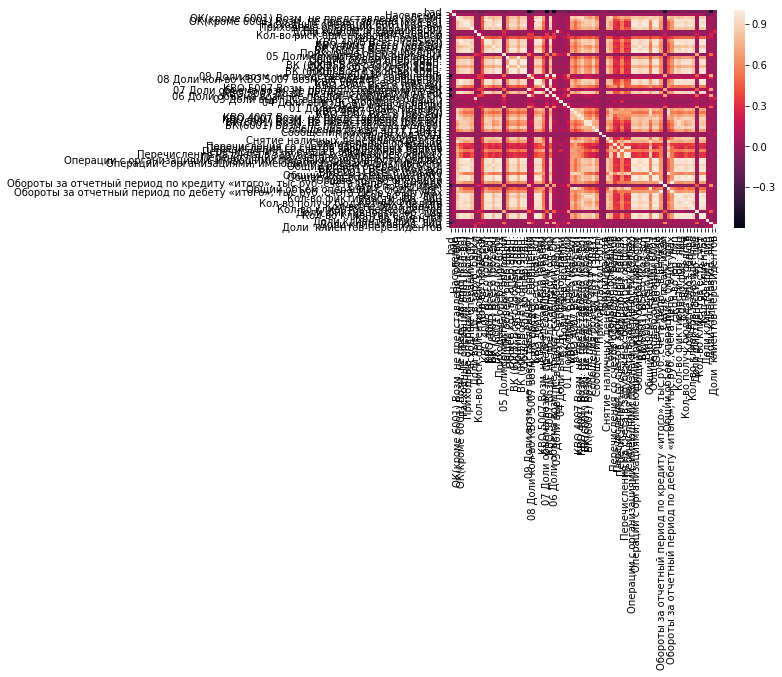

In [3]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

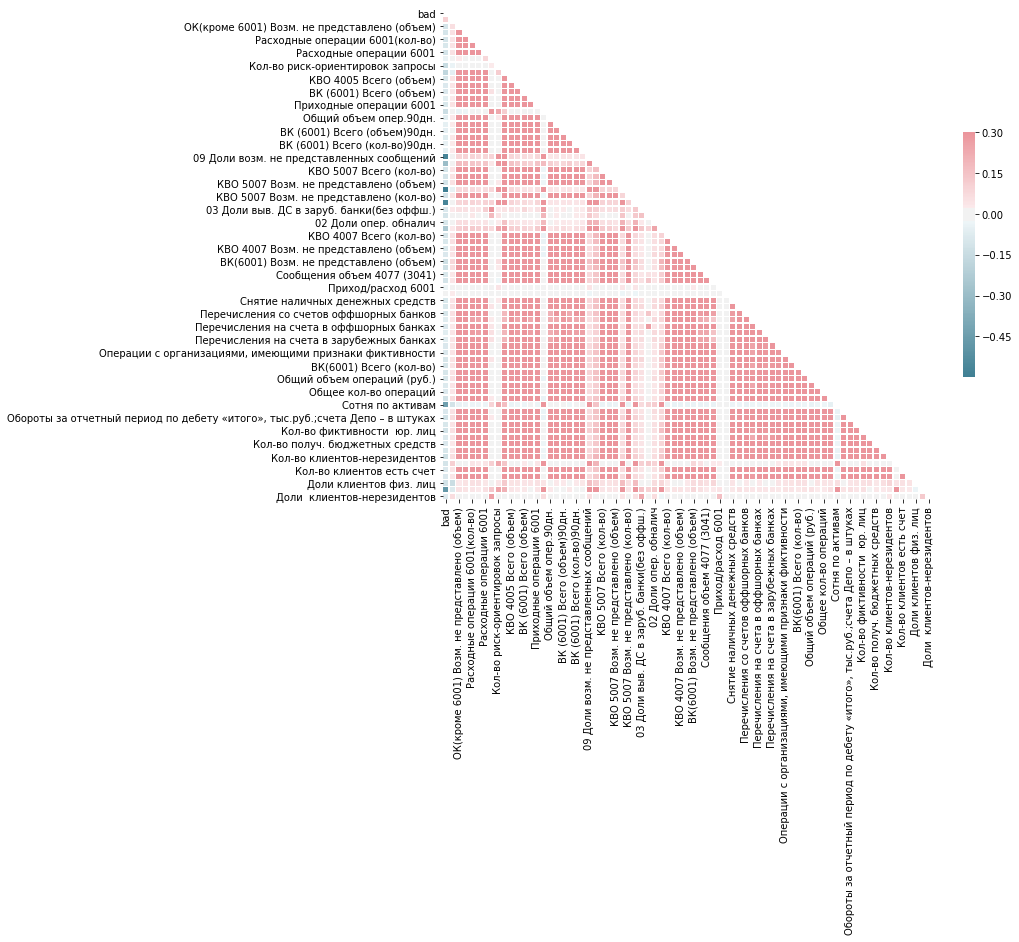

In [4]:
#corr = df.corr()/
#sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
unclr_data = pd.read_excel (r'C:\Jypiter\Uchebnaya_tablitsa_dlya_issledovania.xlsx').loc[:,:]
features = list(unclr_data.columns.values)
f_len = len (features)

unclr_data.head()
unclr_data.dtypes

for lol in features:
    if unclr_data[lol].dtypes == 'object':
        unclr_data = unclr_data.drop([lol], axis=1)

In [41]:
name = 'bad'
i = 0
fed = unclr_data.columns[i].replace(name,'X'+str(i+1))

In [35]:
features = unclr_data.columns
i = 0
for name in features:
    print(unclr_data.columns[i])
    i = i+1

bad
Население
ОК(кроме 6001) Возм. не представлено (объем)
ОК(кроме 6001) Возм. не представлено (кол-во)
Расходные операции 6001(кол-во)
Приходные операции 6001(кол-во)
Расходные операции 6001
Доли выв. ДС в заруб. банки
Кол-во риск-ориентировок запросы
Кол-во проверок
КВО 4005 Всего (объем)
КВО 4005 Всего (кол-во)
ВК (6001) Всего (объем)
ВК (6001) Всего (кол-во)
Приходные операции 6001
05 Доли сомнительных операций
Общий объем опер.90дн.
Общее кол-во опер.90дн.
ВК (6001) Всего (объем)90дн.
Общий объем опер.30дн.
ВК (6001) Всего (кол-во)90дн.
Общее кол-во опер.30дн.
09 Доли возм. не представленных сообщений
08 Доли кол-во КВО 5007 возм. не предст. сообщений
КВО 5007 Всего (кол-во)
КВО 5007 Всего (объем)
КВО 5007 Возм. не представлено (объем)
07 Доли объема возм. не предст. сообщений по ВК
КВО 5007 Возм. не представлено (кол-во)
06 Доли объема возм. не предст. сообщений по ОК
03 Доли выв. ДС в заруб. банки(без оффш.)
04 Доли выв. ДС в оффшор. банки
02 Доли опер. обналич
01 Доли опер. с 

In [51]:

features = unclr_data.columns
val = []

i = 0
for name in features:
    #print(name)
    val.append(unclr_data.columns[i].replace(name,'X'+str(i+1)))
    i = i+1
unclr_data.columns = val

['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75']


In [52]:
unclr_data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75
0,0,12263861,280074328480,18766,11492,21298,20183270043,6.863105,1,0,...,7170,25,56,396,7.448889,18304,19261,39.171766,61.461976,2.163462
1,0,5208690,157537353,205,223,114,169231559,0.000000,0,0,...,26,0,0,1,7.171315,277,304,9.386282,90.613718,0.361011
2,1,12263861,0,0,0,0,0,0.000000,0,0,...,0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
3,1,12263861,8123066430,994,487,360,529987788,0.222585,0,0,...,84,12,3,5,8.755130,812,854,10.344828,90.024631,0.615764
4,1,12263861,0,0,0,0,0,0.000000,0,0,...,9,0,0,0,0.000000,24,24,37.500000,62.500000,0.000000
5,0,1931158,782988912,360,3588,3798,7898864925,1.545759,0,0,...,43,0,0,1,23.076923,787,848,5.463787,95.806861,0.127065
6,0,3209325,2901198842,1622,1783,1401,2311158542,0.161198,1,0,...,335,9,2,13,8.931965,2950,3755,11.355932,89.186441,0.440678
7,1,12263861,0,0,0,0,0,0.000000,0,0,...,2,0,0,0,0.000000,2,2,100.000000,0.000000,0.000000
8,0,5208690,2138188211,1363,3960,2446,4380908694,0.698592,0,0,...,139,12,1,9,16.638442,2482,3023,5.600322,95.165189,0.362611
9,0,5208690,3307179293,1026,7011,4716,11869686852,0.271471,0,0,...,173,0,9,5,13.283951,2173,2414,7.961344,93.189139,0.230097
